## What is a Decision Tree?
<p style="text-align: justify;"> A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements. In short, a decision tree is a function as a decision model. These decision trees are trained according to a training data set. The algorithms most used to the construction of these trees are IDE, C4.5, and ASSISTANT.</p>

## An example dataset

In [1]:
import pandas as pd 
  
data = [['Day1', 'Sun', 'Warm', 'High', 'Weak', 'No'], 
        ['Day2', 'Sun', 'Warm', 'High', 'Strong', 'No'],
        ['Day3', 'Cloud', 'Warm', 'High', 'Weak', 'Yes'],
        ['Day4', 'Rain', 'Soft', 'High', 'Weak', 'Yes'], 
        ['Day5', 'Rain', 'Fresh', 'Normal', 'Weak', 'Yes'],
        ['Day6', 'Rain', 'Fresh', 'Normal', 'Strong', 'No'],
        ['Day7', 'Cloud', 'Fresh', 'Normal', 'Weak', 'Yes'], 
        ['Day8', 'Sun', 'Soft', 'High', 'Weak', 'No'],
        ['Day9', 'Sun', 'Fresh', 'Normal', 'Weak', 'Yes'],
        ['Day10', 'Rain', 'Soft', 'Normal', 'Strong', 'Yes'],
        ['Day11', 'Sun', 'Soft', 'Normal', 'Strong', 'Yes'], 
        ['Day12', 'Cloud', 'Soft', 'High', 'Strong', 'Yes'],
        ['Day13', 'Cloud', 'Warm', 'Normal', 'Weak', 'Yes'],
        ['Day14', 'Rain', 'Soft', 'High', 'Strong', 'No']]


df = pd.DataFrame(data, columns = ['Day', 'Aspect', 'Temperature', 'Humidity','Wind','Output']) 
df.head(12)

,Day,Aspect,Temperature,Humidity,Wind,Output
0,Day1,Sun,Warm,High,Weak,No
1,Day2,Sun,Warm,High,Strong,No
2,Day3,Cloud,Warm,High,Weak,Yes
3,Day4,Rain,Soft,High,Weak,Yes
4,Day5,Rain,Fresh,Normal,Weak,Yes
5,Day6,Rain,Fresh,Normal,Strong,No
6,Day7,Cloud,Fresh,Normal,Weak,Yes
7,Day8,Sun,Soft,High,Weak,No
8,Day9,Sun,Fresh,Normal,Weak,Yes
9,Day10,Rain,Soft,Normal,Strong,Yes


## Categorization (Transforming to numeric data)

In [2]:
df_type_1 = df.select_dtypes(include=['int64']).copy()
df_type_2 = df.select_dtypes(include=['float64']).copy()
df_type_3 = pd.concat([df_type_2, df_type_1], axis=1, join_axes=[df_type_1.index])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  This is separate from the ipykernel package so we can avoid doing imports until


## Categorization using Sklearn

In [3]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

categorization = preprocessing.LabelEncoder()
categorization.fit(df["Aspect"].astype(str))
list(categorization.classes_)

df_object = df.astype(str).apply(categorization.fit_transform)
df_formated = pd.concat([df_type_3, df_object], axis=1, join_axes=[df_type_3.index])
df_formated.head(12)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  if __name__ == '__main__':


,Day,Aspect,Temperature,Humidity,Wind,Output
0,0,2,2,0,1,0
1,6,2,2,0,0,0
2,7,0,2,0,1,1
3,8,1,1,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,1,1
7,12,2,1,0,1,0
8,13,2,0,1,1,1
9,1,1,1,1,0,1


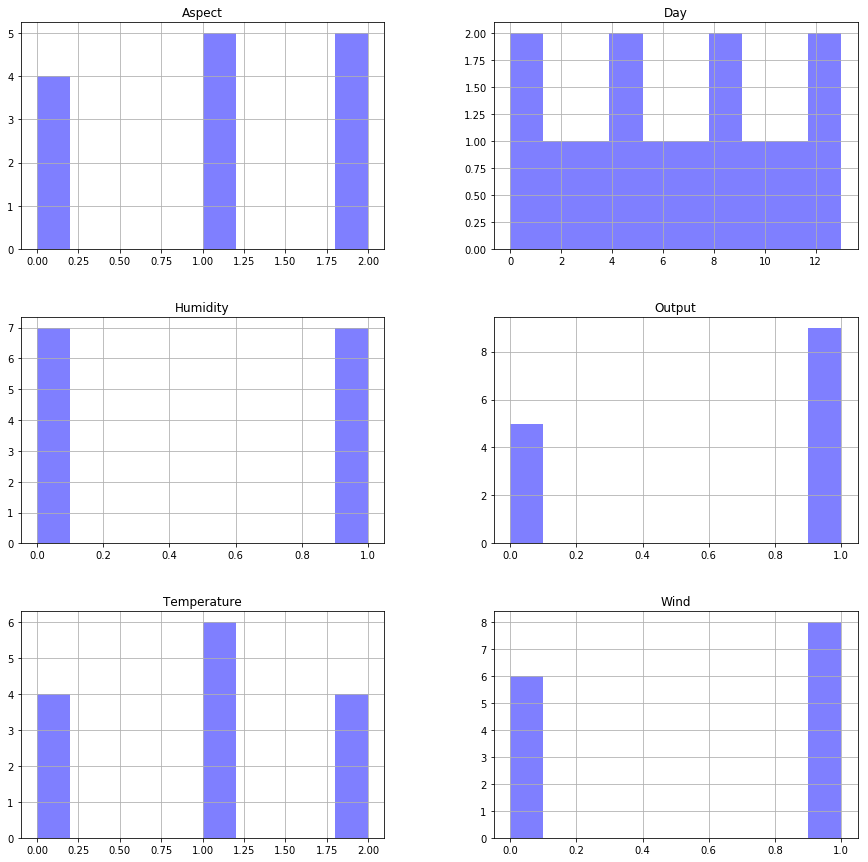

In [4]:
import matplotlib.pyplot as plt
df_formated.hist(alpha=0.5, figsize=(15, 15), color='blue')
plt.show()

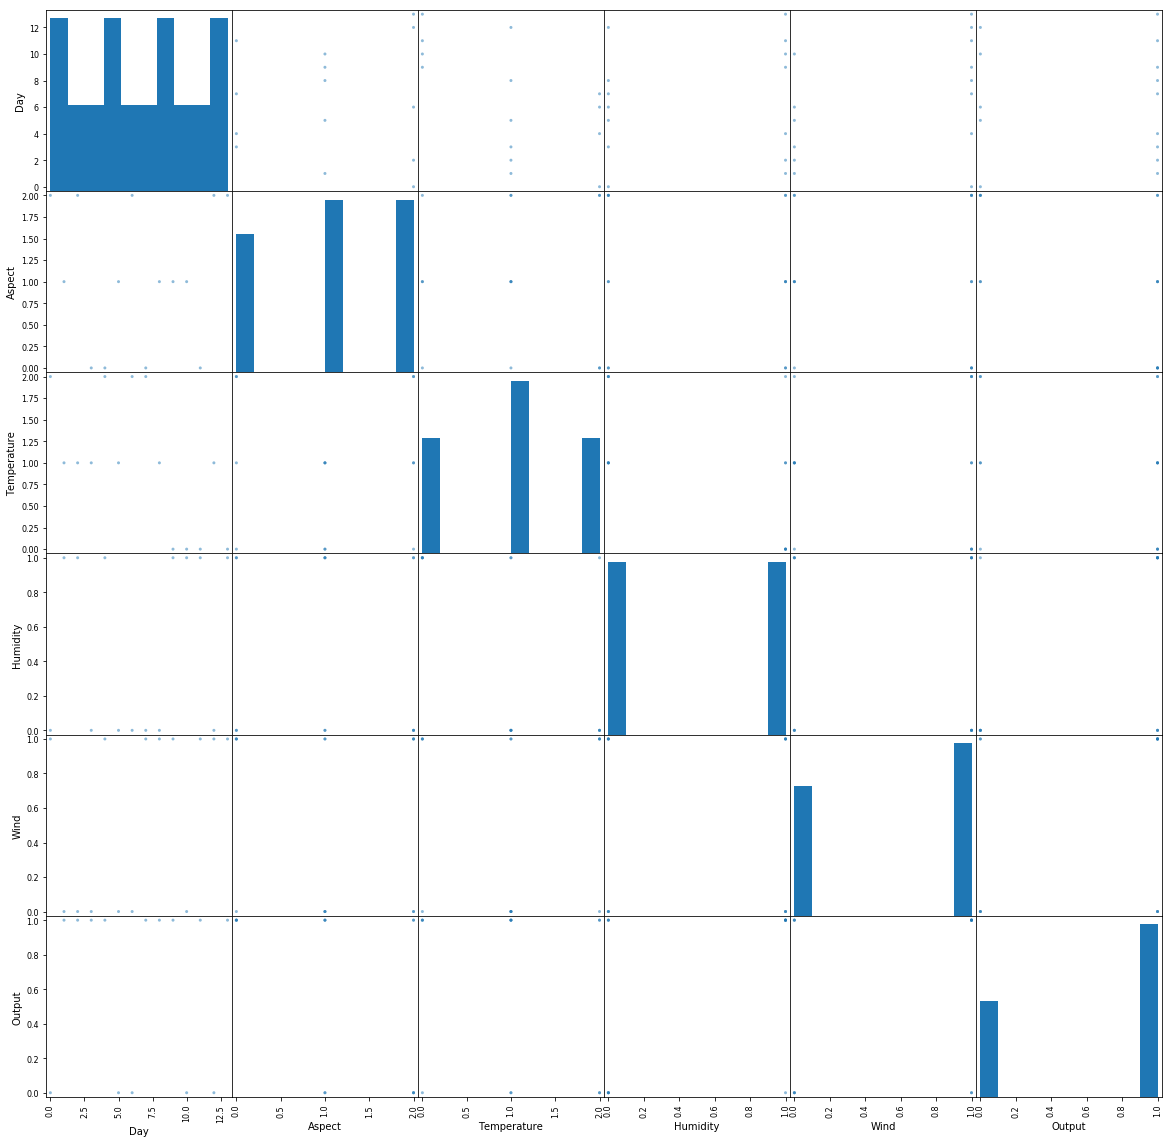

In [5]:
import pandas
from pandas.plotting import scatter_matrix

scatter_matrix(df_formated, alpha=0.5, figsize=(20, 20))
plt.show()

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

X = df_formated.ix[:,'Day':'Wind':] 
y = df_formated.ix[:, 'Output':]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  "

## Training and Visualizing our Decision Tree

In [7]:
tree_clf = DecisionTreeClassifier(max_depth=6)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

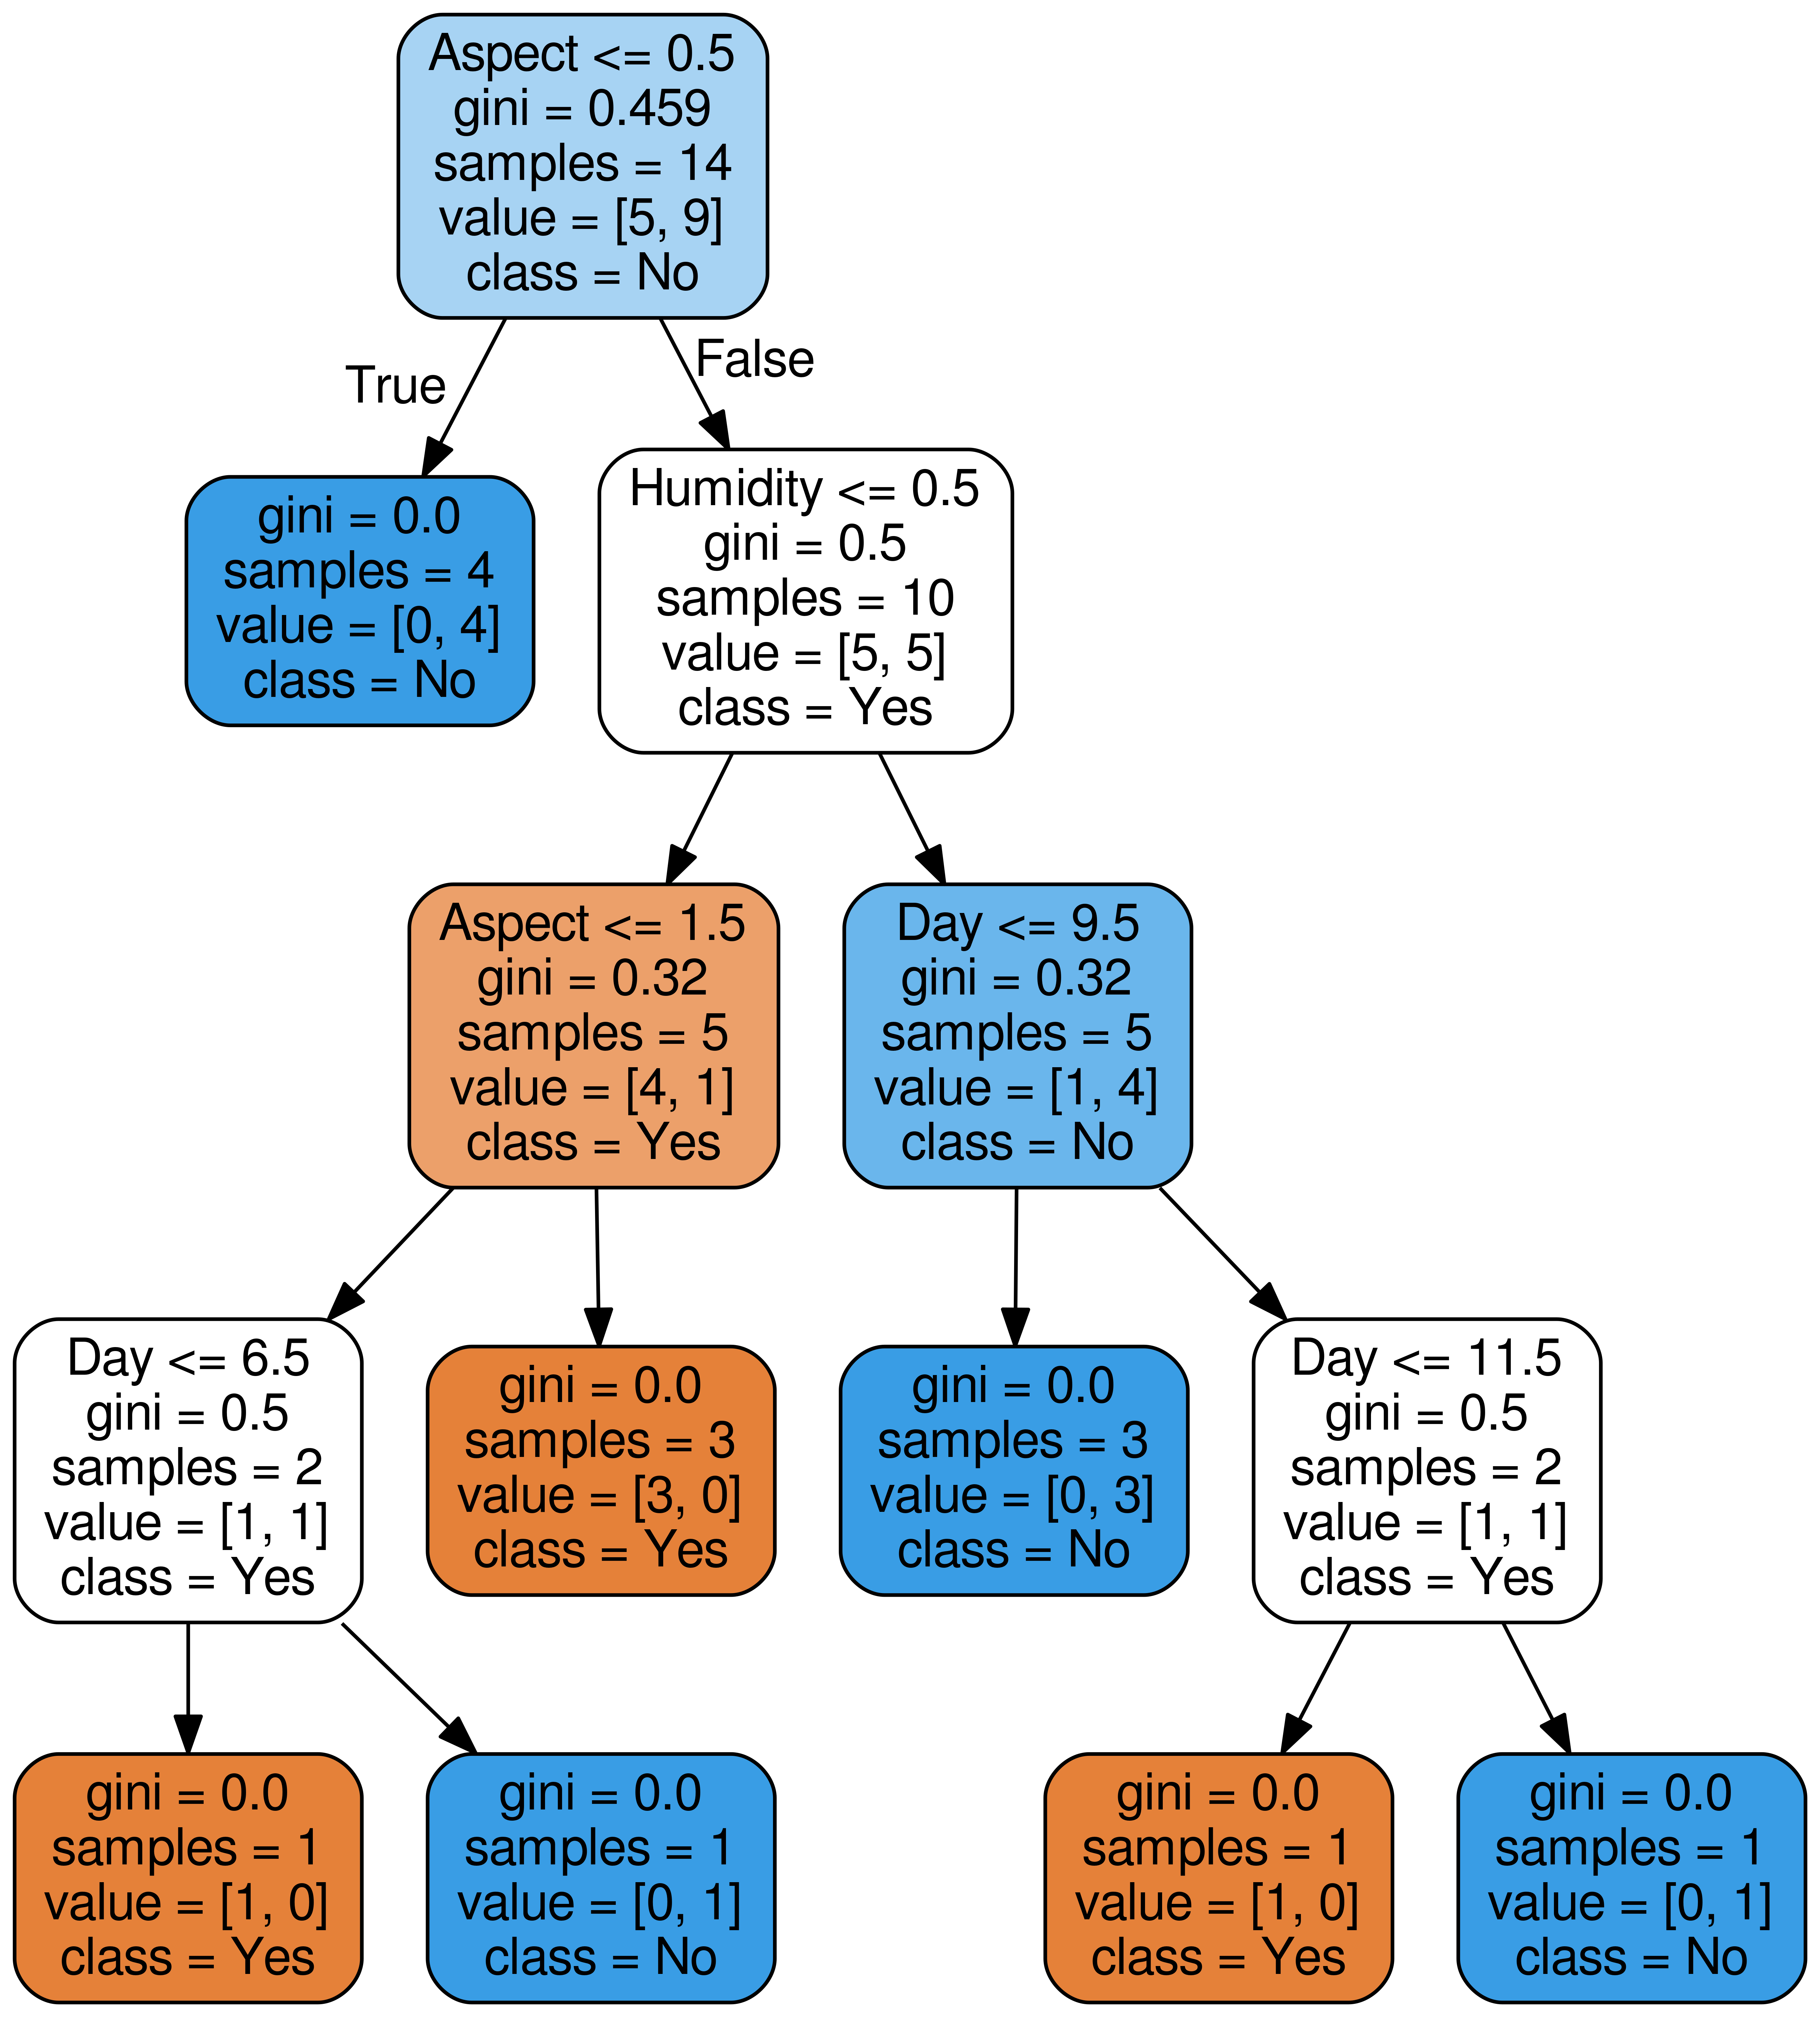

In [8]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call
from graphviz import Digraph

t = export_graphviz(tree_clf,out_file='tree_decision.dot',
                    feature_names=['Day','Aspect','Temperature','Humidity','Wind'],
                    class_names=['Yes', 'No'],
                    rounded=True,filled=True)

call(['dot', '-Tpng', 'tree_decision.dot', '-o', 'tree.png', '-Gdpi=800'])
Image(filename = 'tree.png')

## Entropy Calculation
The entropy of a set can be defined as the purity of the set. Given a set $S$, with instances belonging to class $i$, with probability $pi$, the entropy is defined as:

To build a decision tree, we need to calculate the entropy using the frequency table of only one attribute and the entropy of the two attributes.

### Entropy Calculation only One Attribute:
$$
Entropy(S) = \sum_{i=1}^{c}({{-P_i}} ({{log_2}} {{P_i}})
$$

### Entropy Calculation Two Attributes:
$$
Entropy(T, X) = \sum_{c {E} x}^{c}({{P(C)}} {{Entropy(C)}})
$$